In [226]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pylab as plt

In [255]:
df = pd.read_csv('wellness_fact.csv')
df["weather_key"] = df.apply (lambda x: (x["weather_key"]-1).astype('int'), axis=1)

df1 = pd.read_csv('County_Information.csv')
df2 =  pd.read_csv('air_quality_u.csv', low_memory=False)
df3 = pd.read_csv('weather_dimension.csv')
df4 =  pd.read_csv('Health_Measures.csv')

# Data Summarization

### County Information Dimenetion

In [228]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_POP,69146.0,51911.598849,237183.352859,0.0,323.00,3665.0,26142.50,10094865.0
TOT_MALE,69146.0,25579.996717,116546.267246,0.0,165.00,1870.0,13068.75,4975410.0
TOT_FEMALE,69146.0,26331.602132,120664.214374,0.0,158.00,1791.0,13034.50,5119774.0
WA_MALE,69146.0,19777.272004,84471.135529,0.0,135.00,1419.0,11145.50,3576337.0
WA_FEMALE,69146.0,20103.750195,85365.646318,0.0,128.00,1359.0,11160.00,3573494.0
...,...,...,...,...,...,...,...,...
HAAC_MALE,34573.0,168.905880,1280.699907,0.0,2.00,9.0,37.00,52603.0
HAAC_FEMALE,34573.0,169.451306,1296.059862,0.0,2.00,8.0,34.00,52475.0
HNAC_MALE,34573.0,60.282590,448.334121,0.0,1.00,4.0,18.00,18860.0
HNAC_FEMALE,34573.0,57.796257,445.977065,0.0,0.00,3.0,15.00,18364.0


Hints at discontinuation of the collecting data in the measures which have bar graph:

<Axes: ylabel='index'>

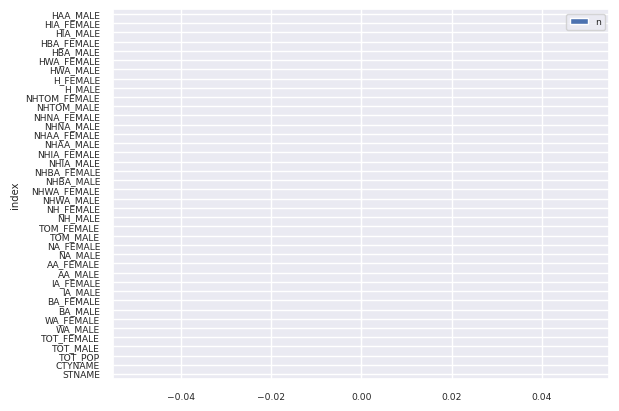

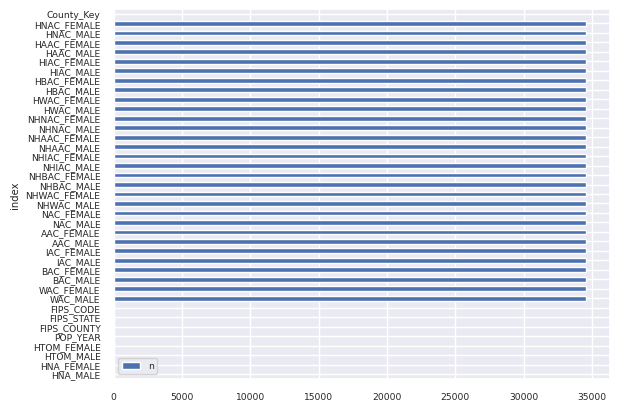

In [233]:
sns.set(font_scale=0.6)
df1.iloc[:,:40].isna().sum().reset_index(name="n").plot.barh(x='index', y='n')
df1.iloc[:,41:].isna().sum().reset_index(name="n").plot.barh(x='index', y='n')

All missing values start from 2000:

In [234]:
dtf = df1.loc[:, df1.isna().any()].join(df1[['FIPS_STATE','FIPS_COUNTY','POP_YEAR']])
dtf[dtf.isna().any(axis=1)].sort_values(by = ['POP_YEAR'])

,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,...,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,FIPS_STATE,FIPS_COUNTY,POP_YEAR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,2000
14047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,5,2000
5170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,19,2000
29403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,189,2000
20515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,315,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,13,2010
20470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,305,2010
10427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,33,2010
2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,33,2010


In [266]:
sns.set(font_scale=0.6)

Correlation of variables

<Axes: >

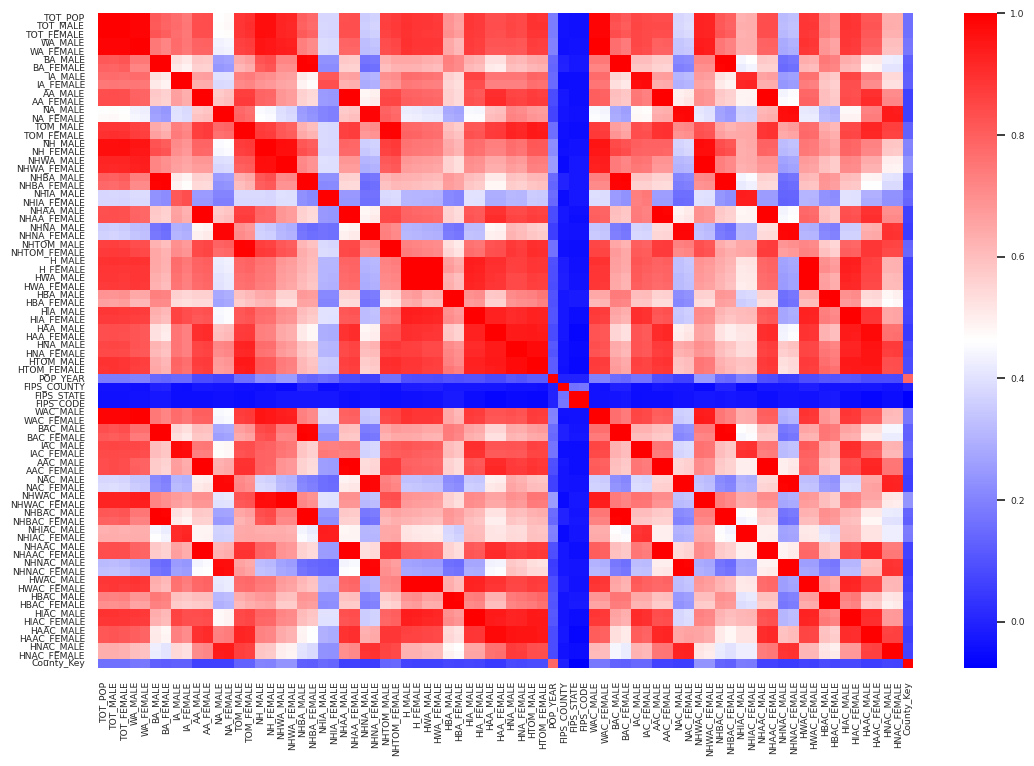

In [267]:
corr = df1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
         cmap= "bwr" )

### Air Quality Dimention

In [235]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,40173.0,20086.000000,11597.090519,0.000000,10043.000000,20086.000000,30129.000000,40172.000000
county_code,40173.0,86.510741,102.777202,1.000000,27.000000,63.000000,111.000000,901.000000
year,40173.0,2002.103701,11.696871,1980.000000,1993.000000,2002.000000,2012.000000,2022.000000
arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million,9623.0,0.769080,0.612349,-0.066489,0.338869,0.620185,1.037431,21.460269
arithmetic_mean Carbon monoxide observed values Parts per million,8.0,0.118154,0.047615,0.028780,0.098385,0.131378,0.150762,0.168280
arithmetic_mean Carbon monoxide obseved hourly values Parts per million,9623.0,0.764914,0.612125,-0.064737,0.335542,0.615375,1.030273,21.828903
arithmetic_mean Nitric oxide (NO) observed values Parts per billion,7823.0,8.422500,10.355253,-2.063636,1.309773,4.721132,11.844707,120.980962
arithmetic_mean Nitrogen dioxide (NO2) daily maximum 1-hour average Parts per billion,9858.0,24.658156,13.454829,0.000000,14.540459,23.562660,33.458064,106.853933
arithmetic_mean Nitrogen dioxide (NO2) observed values Parts per billion,10451.0,12.567069,8.135971,0.000000,6.214482,11.302589,17.657308,65.168000
arithmetic_mean Ozone daily maxima of observed hourly values (between 9:00 am and 8:00 pm) Parts per million,27683.0,0.050441,0.007656,0.000000,0.045586,0.050067,0.055397,0.105000


Quite a lot of missing data. Unfortunatelly this is a common issues with this type of data.

(40173, 59)


<Axes: ylabel='index'>

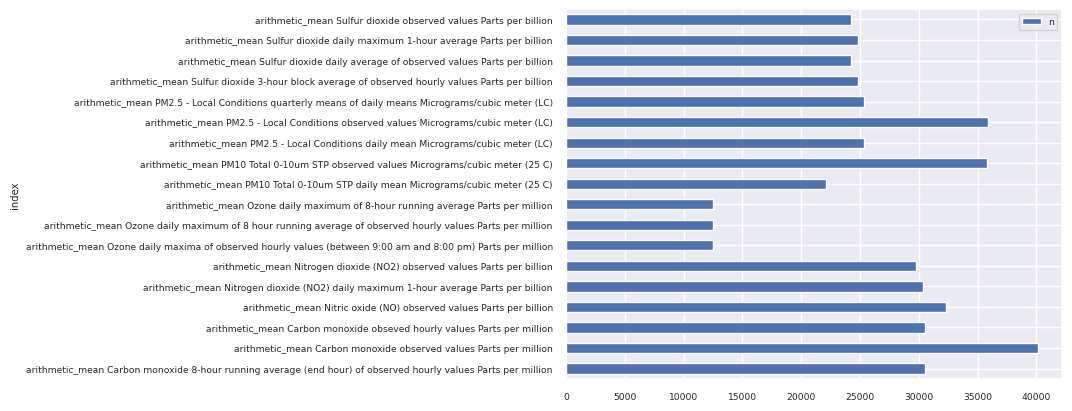

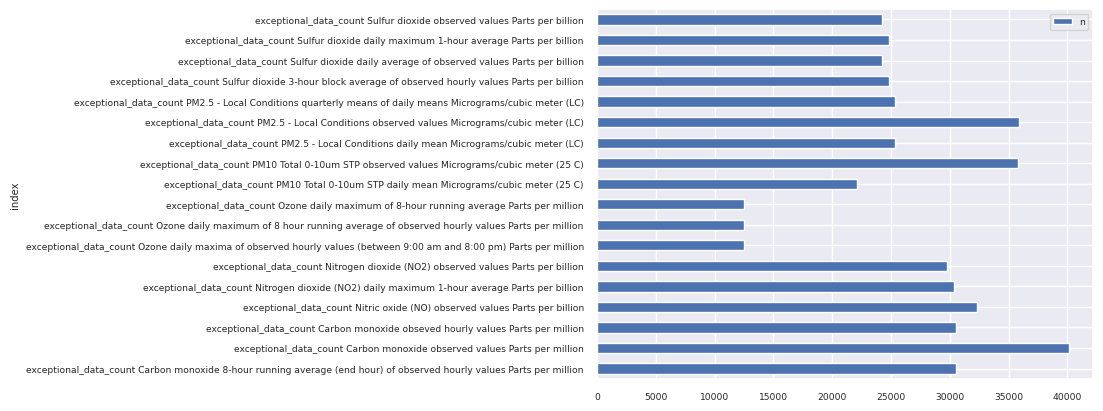

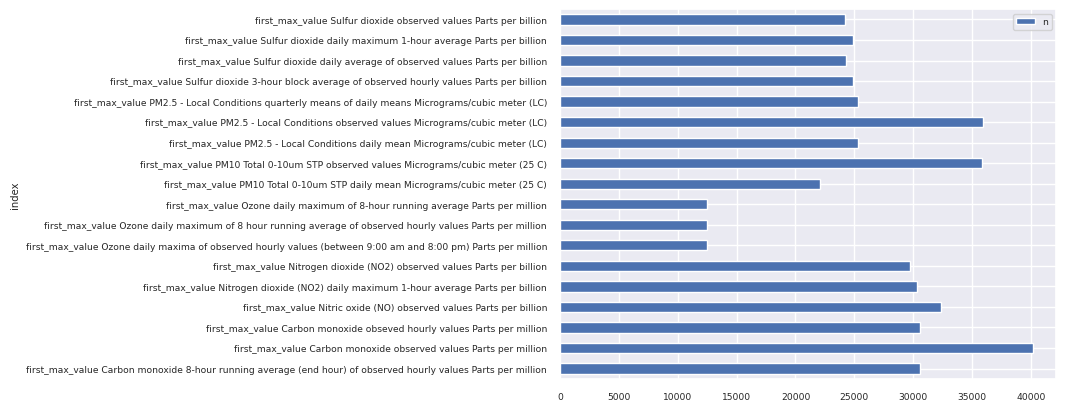

In [236]:
print(df2.shape)
df2.loc[:,df2.columns.str.contains("arithmetic_mean")].isna().sum().reset_index(name="n").plot.barh(x='index', y='n')
df2.loc[:,df2.columns.str.contains("exceptional_data")].isna().sum().reset_index(name="n").plot.barh(x='index', y='n')
df2.loc[:,df2.columns.str.contains("first_max_value")].isna().sum().reset_index(name="n").plot.barh(x='index', y='n')

Bar graph below suggests that there is unconsistency of collecting data which is related to the state where data is collected.

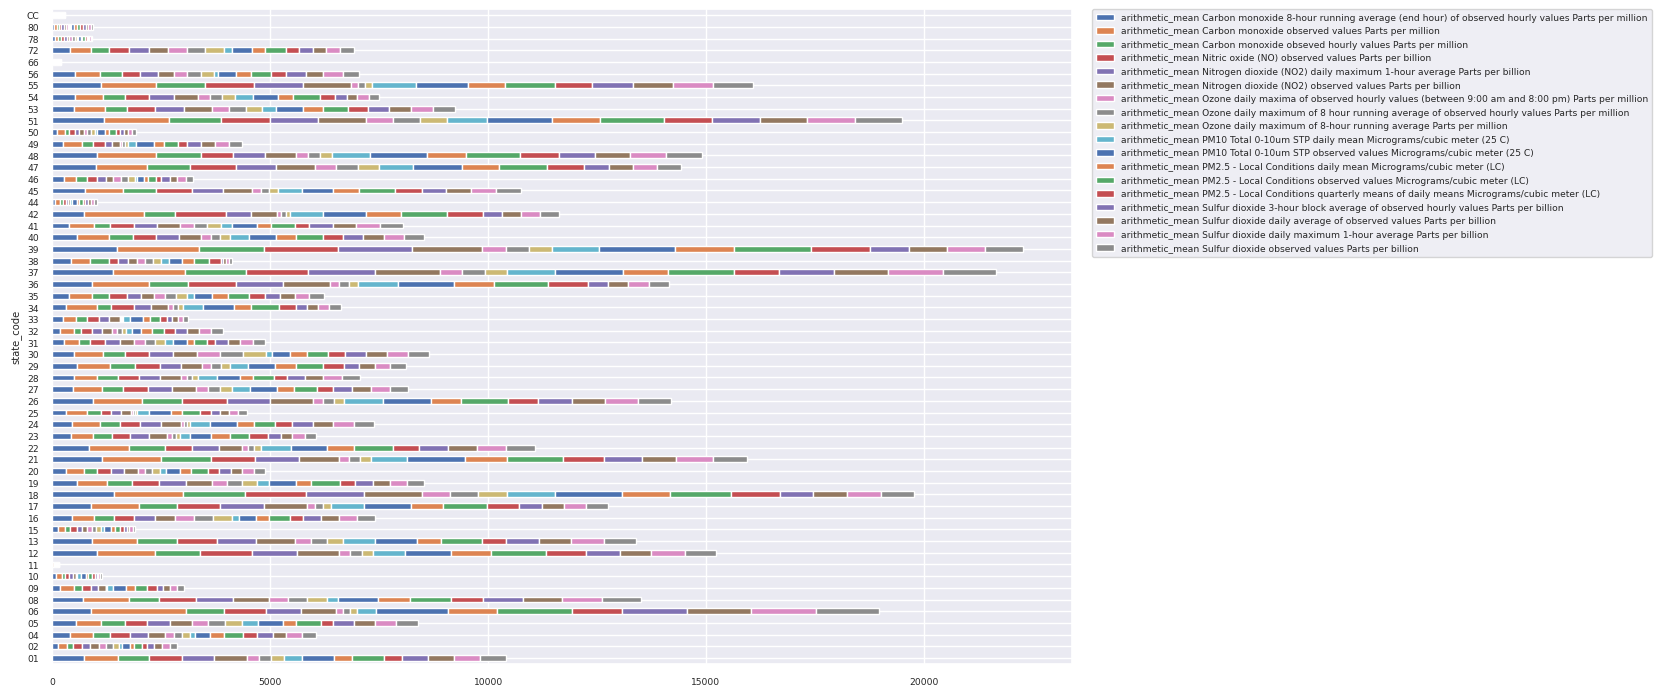

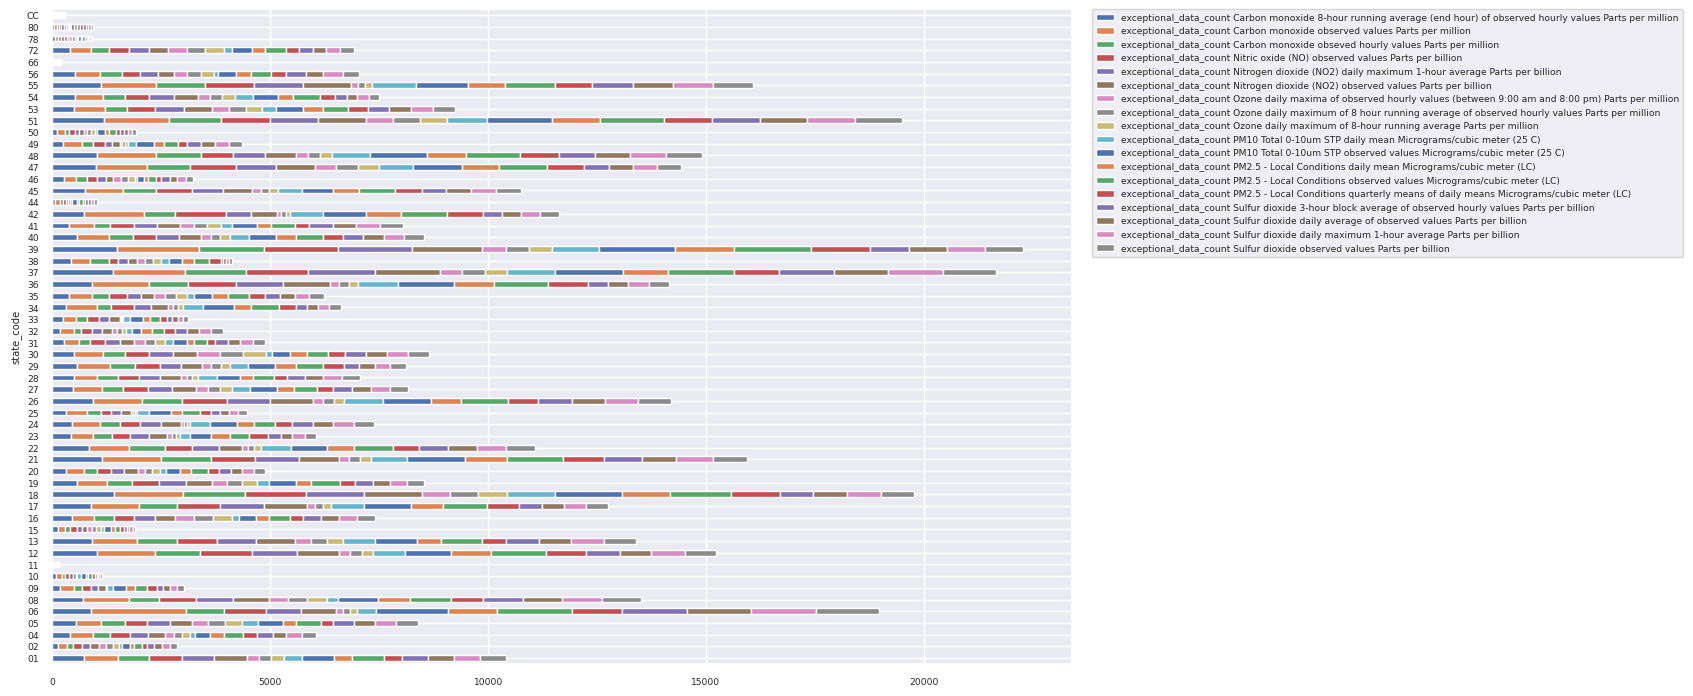

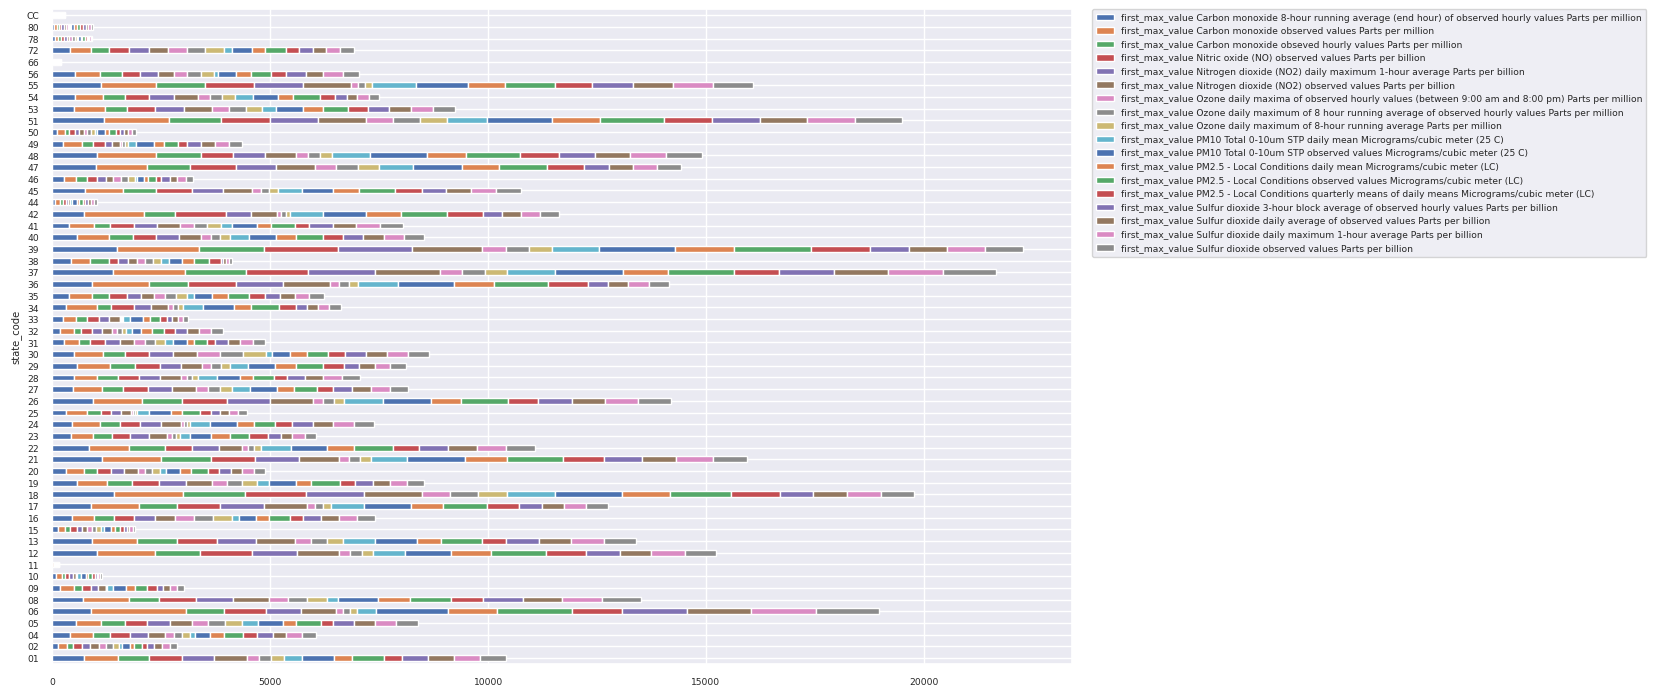

In [268]:
dft=df2.drop('state_code', 1).isna().groupby(df2.state_code, sort=True).sum().reset_index()
dft.index = dft['state_code']
dft.drop('state_code', 1)
dft1=dft[dft.columns[dft.columns.str.contains("arithmetic_mean")]]
dft1.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
dft2=dft[dft.columns[dft.columns.str.contains("exceptional_data")]]
dft2.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
dft3=dft[dft.columns[dft.columns.str.contains("first_max_value")]]
dft3.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Bar graph below shows that missing data is fairly constant throughout the years for each measure.

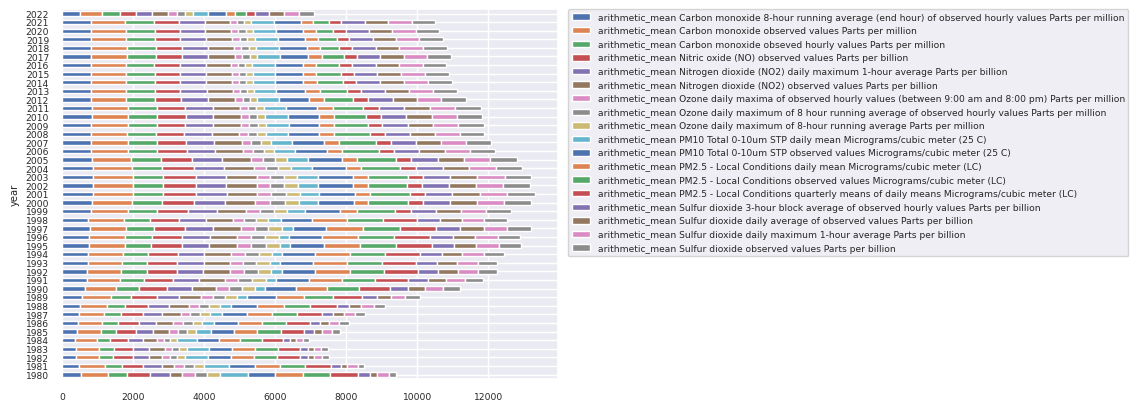

In [238]:
dft=df2.drop('year', 1).isna().groupby(df2.year, sort=True).sum().reset_index()
dft.index = dft['year']
dft.drop('year', 1)
dft=dft[dft.columns[dft.columns.str.contains("arithmetic_mean")]]
dft.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Correlation between variables

<Axes: >

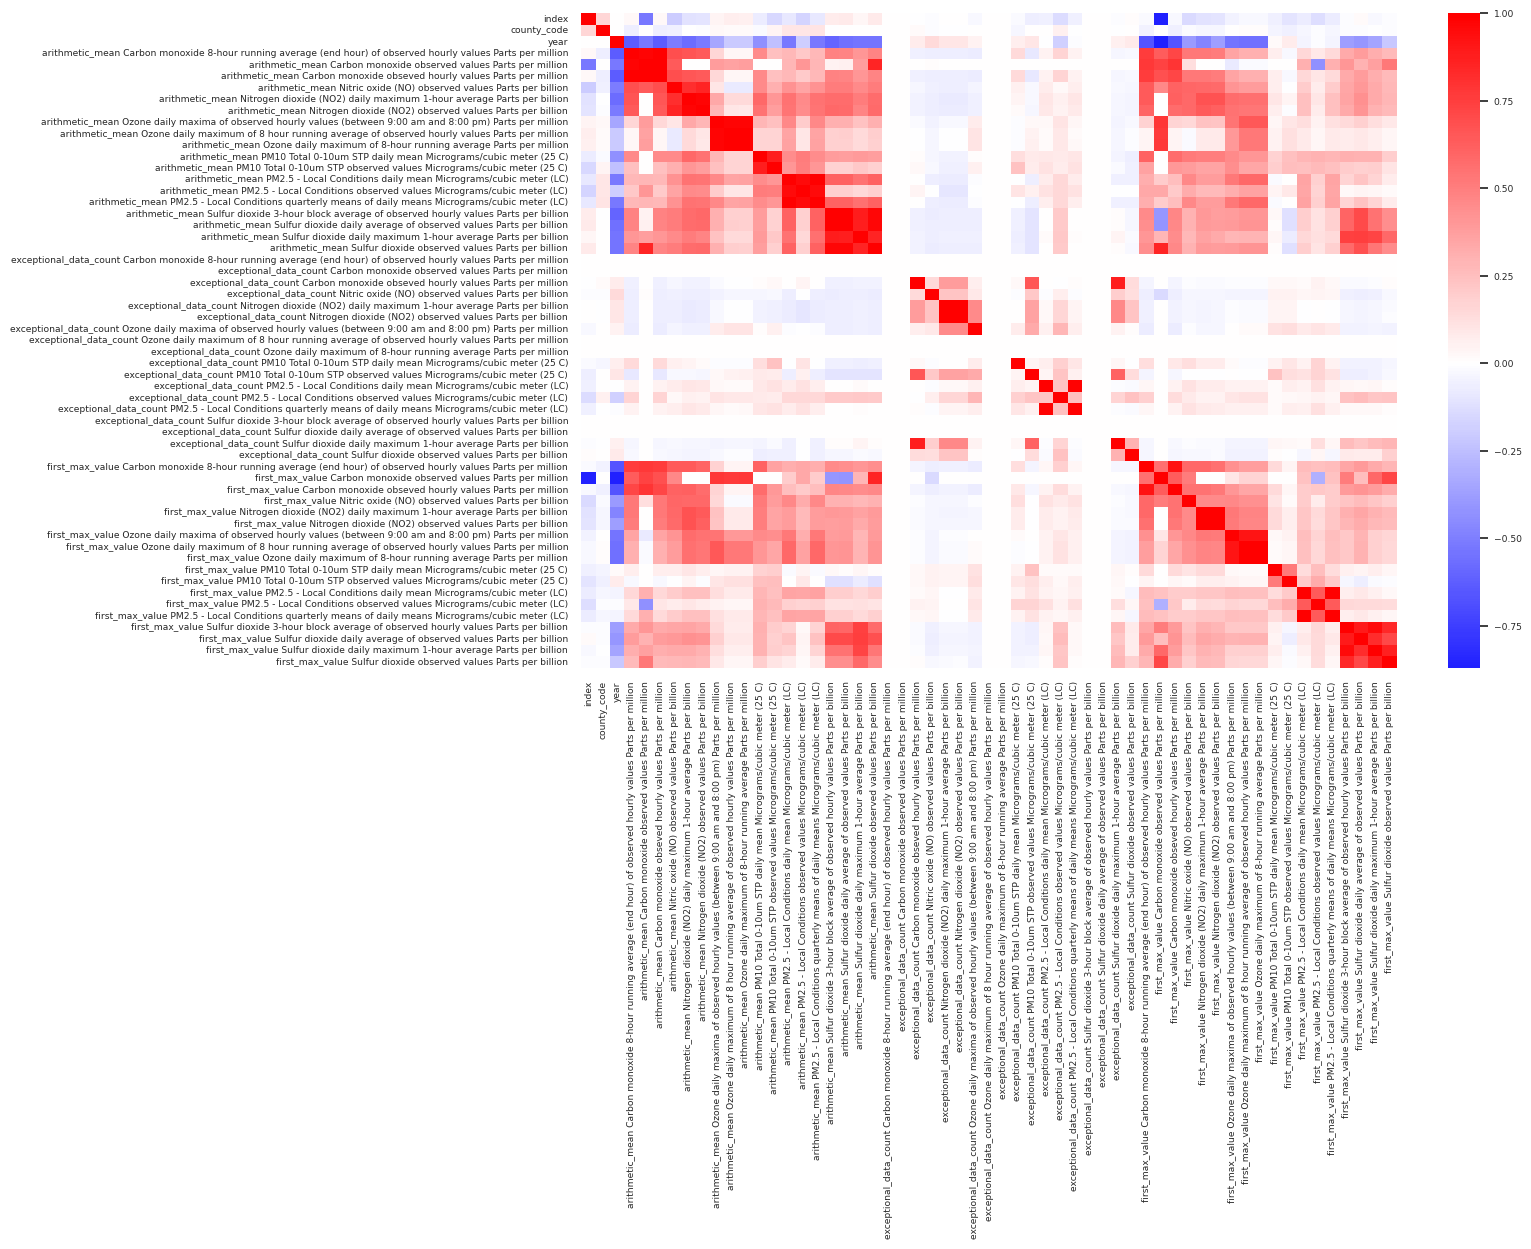

In [269]:
corr = df2.corr()
corr = corr.fillna(0)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
         cmap= "bwr", center=0)

### Weather Dimention

In [240]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
state_code,400636.0,24.961092,13.807371,1.00,13.00,24.00,39.00,50.00
county_fips,400636.0,103.552072,107.451100,1.00,35.00,79.00,133.00,840.00
year,400636.0,1958.610075,36.915393,1895.00,1927.00,1959.00,1991.00,2022.00
average_precipitation,400636.0,3.179049,1.365411,0.03,2.22,3.21,4.00,23.57
maximum_temperature,400636.0,87.710639,6.418718,48.80,83.80,88.20,92.00,111.20
minimum_temperature,400636.0,19.376850,12.648016,-37.80,11.00,20.10,28.60,62.60
average_temperature,400636.0,53.870273,8.633661,8.93,47.54,53.86,60.51,78.57


Precipitation in by state is consistent thoughout the years.

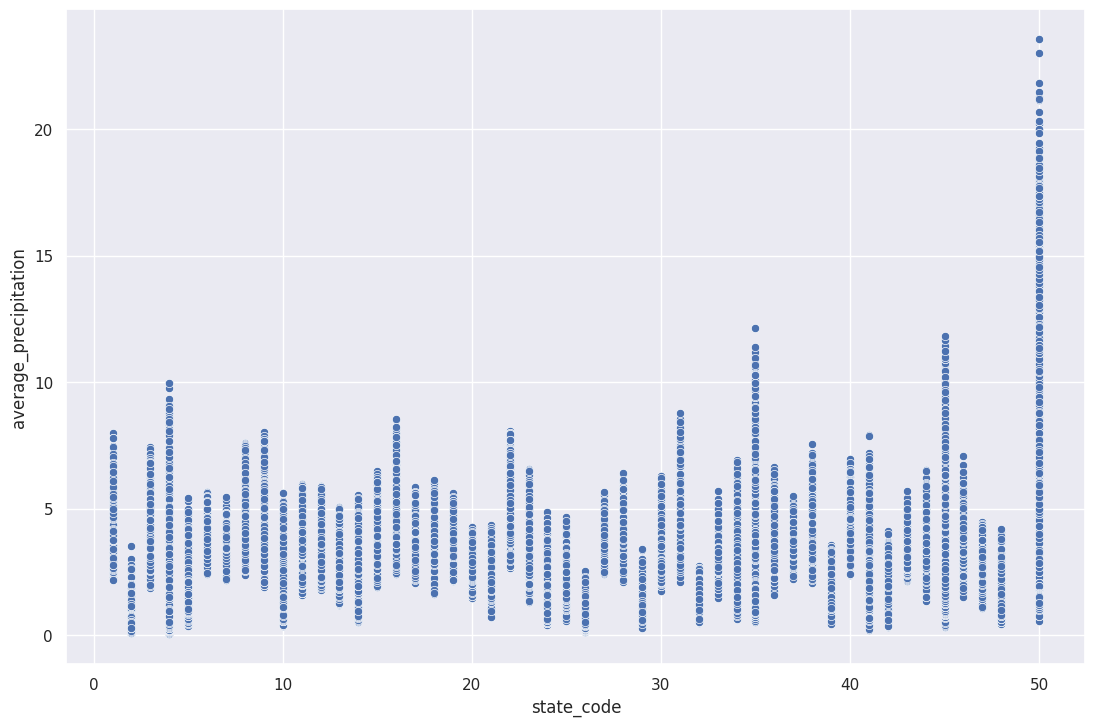

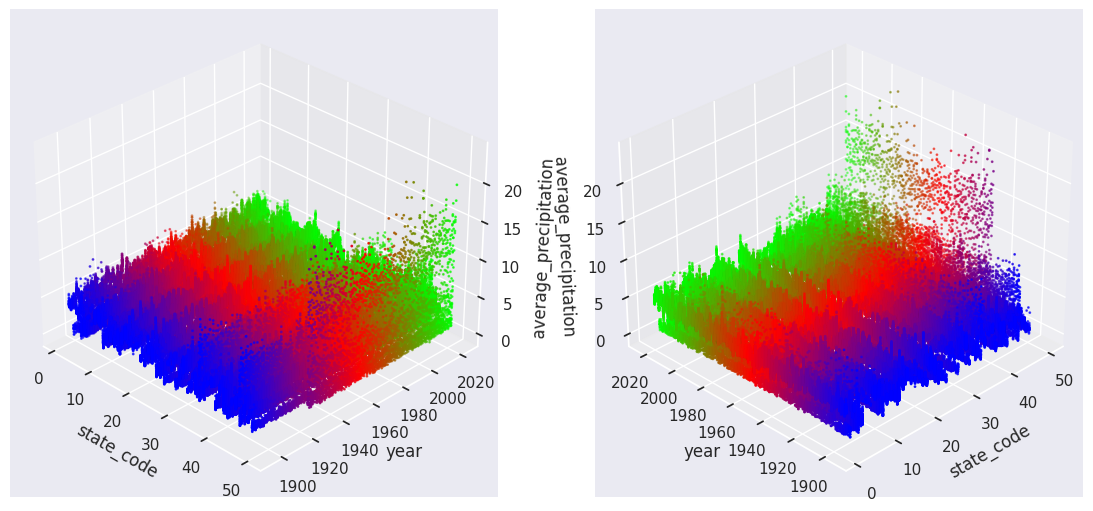

In [241]:
sns.set(rc={'figure.figsize':(13.15,8.5)})
sns.scatterplot(data= df3, x="state_code", y="average_precipitation" )

fig = plt.figure()
fig.set_figwidth(13.85)
ax = fig.add_subplot(121, projection = '3d')
ax.scatter( df3['state_code'], df3['year'], df3['average_precipitation'], c=df3['year'], cmap='brg', s=1)
ax.set_xlabel("state_code")
ax.set_ylabel("year")
ax.set_zlabel("average_precipitation")
ax.view_init(30.0, -45)

ax = fig.add_subplot(122, projection = '3d')
ax.scatter( df3['state_code'], df3['year'], df3['average_precipitation'], c=df3['year'], cmap='brg', s=1)
ax.set_xlabel("state_code")
ax.set_ylabel("year")
ax.set_zlabel("average_precipitation")
ax.view_init(30.0, -135)

plt.show()

Correlation matrix indicates that temperatures are related

<Axes: >

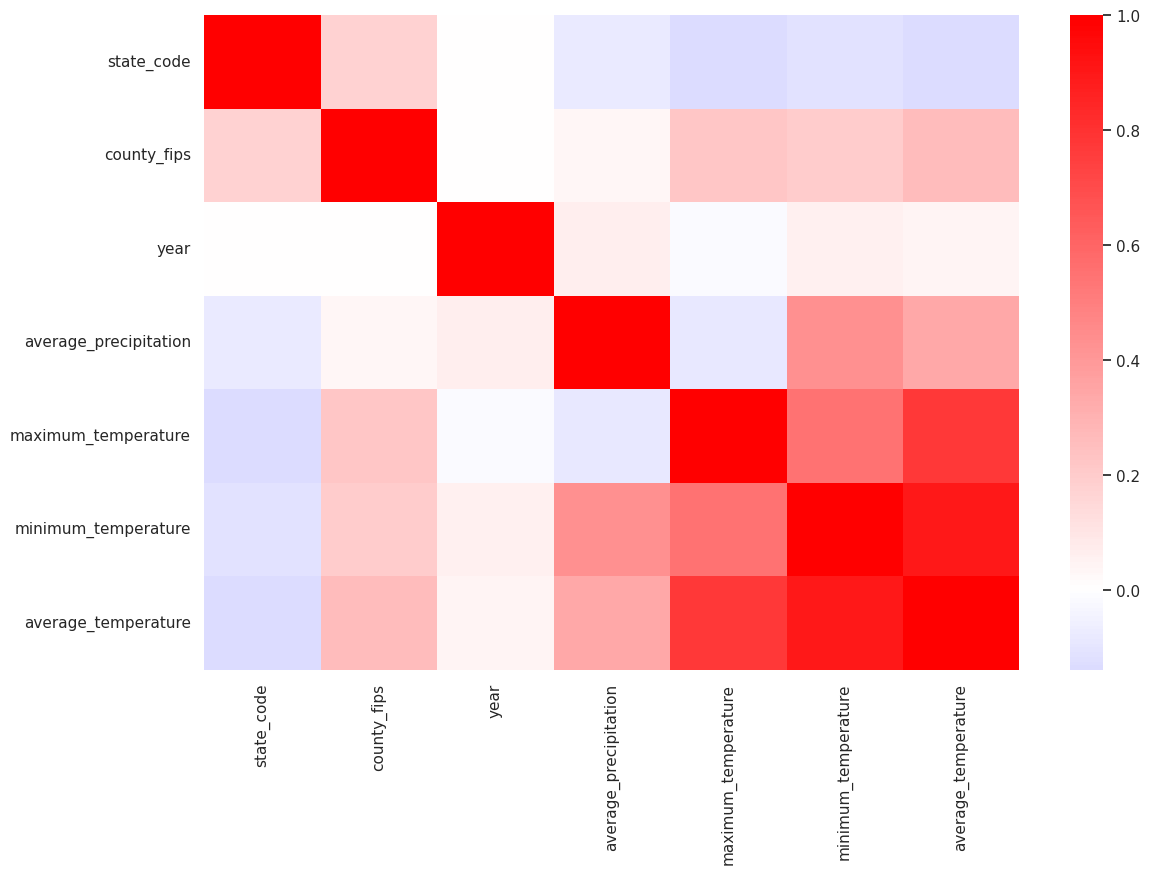

In [242]:
corr = df3.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
         cmap= "bwr", center=0)

# Data Transformation

### Imputing Values for Air Quality:

To overcome the issue of missing data county adjecency data was imported to use geographic proximity of counties in data imputation.

In [245]:
df_helper = pd.read_csv('county_adjacency2010.csv').drop(['countyname', 'neighborname'], axis=1)
df_helper = df_helper[df_helper.fipscounty != df_helper.fipsneighbor] 
df_helper

,fipscounty,fipsneighbor
1,1001,1021
2,1001,1047
3,1001,1051
4,1001,1085
5,1001,1101
...,...,...
22191,72153,72081
22192,72153,72093
22193,72153,72121
22197,78020,78030


In [178]:
lst = df_helper[df_helper.fipscounty == 1089]
lst

,fipscounty,fipsneighbor
308,1089,1071
309,1089,1083
311,1089,1095
312,1089,1103
313,1089,47051
314,1089,47103


In [191]:
ddf = df2[df2.state_code != 'CC'][df2.state_code != '80'].drop(['arithmetic_mean Carbon monoxide observed values Parts per million'],  axis=1)
ddf["FIPS"] = ddf.apply (lambda x: int(x['FIPS']), axis=1)

In [246]:
df2[df2.state_code != 'CC'][df2.state_code != '80'].drop(['arithmetic_mean Carbon monoxide observed values Parts per million'],  axis=1).isna().sum()

index                                                                                                                       0
FIPS                                                                                                                        0
state_code                                                                                                                  0
county_code                                                                                                                 0
year                                                                                                                        0
arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million           30497
arithmetic_mean Carbon monoxide obseved hourly values Parts per million                                                 30497
arithmetic_mean Nitric oxide (NO) observed values Parts per billion                                                   

In [192]:
col= 'arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million'
y = [x for x in ddf.columns.tolist()[5:] if "exceptional_data_count" not in x] 
y

['arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million',
 'arithmetic_mean Carbon monoxide obseved hourly values Parts per million',
 'arithmetic_mean Nitric oxide (NO) observed values Parts per billion',
 'arithmetic_mean Nitrogen dioxide (NO2) daily maximum 1-hour average Parts per billion',
 'arithmetic_mean Nitrogen dioxide (NO2) observed values Parts per billion',
 'arithmetic_mean Ozone daily maxima of observed hourly values (between 9:00 am and 8:00 pm) Parts per million',
 'arithmetic_mean Ozone daily maximum of 8 hour running average of observed hourly values Parts per million',
 'arithmetic_mean Ozone daily maximum of 8-hour running average Parts per million',
 'arithmetic_mean PM10 Total 0-10um STP daily mean Micrograms/cubic meter (25 C)',
 'arithmetic_mean PM10 Total 0-10um STP observed values Micrograms/cubic meter (25 C)',
 'arithmetic_mean PM2.5 - Local Conditions daily mean Micrograms/cubic meter (LC)',
 'arithme

In [197]:
for cols in y:
  for x in range(2):
    # get non-null rows for ____ column
    ref = ddf.loc[ddf[cols].notnull(),:]

    # find null nighbours
    lst = df_helper[df_helper.fipscounty.isin(ref['FIPS'])]
    ref2 = ddf[ddf['FIPS'].isin(lst.fipsneighbor)]
    ref2 = ref2[ref2[cols].isnull()]

    # replace all null values with value of the nighbour
    ref[cols] = pd.to_numeric(ref[cols], errors='coerce')
    def impute_geographically(rec):
      l = df_helper[df_helper.fipsneighbor == rec['FIPS']]
      if(len(l.fipscounty) != 1):
        return(ref[ref['FIPS'].isin(l.fipscounty)][cols].mean()+rnd.random()/1000)
      else:
        return(ref[ref['FIPS'] == l.reset_index().fipscounty[0]])
    ref2[cols]= ref2.apply (lambda x: impute_geographically(x[['FIPS', 'year', cols]]), axis=1)

    #join to dataframe
    ddf.loc[ddf.FIPS.isin(ref2.FIPS), [cols]] = ref2[cols]
    print(ddf[cols].isna().sum())


5621
11609
13288
12299
13367
6601
6601
6600
12230
15254
15004
15765
15004
10746
12055
10748
12012
11609
39966
11609
13288
12299
13367
6601
6601
6600
12230
15254
15004
15765
15004
10746
12055
10748
12012


In [200]:
ddf.filter(like='exceptional_data_count', axis=1).fillna(0)

,exceptional_data_count Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million,exceptional_data_count Carbon monoxide observed values Parts per million,exceptional_data_count Carbon monoxide obseved hourly values Parts per million,exceptional_data_count Nitric oxide (NO) observed values Parts per billion,exceptional_data_count Nitrogen dioxide (NO2) daily maximum 1-hour average Parts per billion,exceptional_data_count Nitrogen dioxide (NO2) observed values Parts per billion,exceptional_data_count Ozone daily maxima of observed hourly values (between 9:00 am and 8:00 pm) Parts per million,exceptional_data_count Ozone daily maximum of 8 hour running average of observed hourly values Parts per million,exceptional_data_count Ozone daily maximum of 8-hour running average Parts per million,exceptional_data_count PM10 Total 0-10um STP daily mean Micrograms/cubic meter (25 C),exceptional_data_count PM10 Total 0-10um STP observed values Micrograms/cubic meter (25 C),exceptional_data_count PM2.5 - Local Conditions daily mean Micrograms/cubic meter (LC),exceptional_data_count PM2.5 - Local Conditions observed values Micrograms/cubic meter (LC),exceptional_data_count PM2.5 - Local Conditions quarterly means of daily means Micrograms/cubic meter (LC),exceptional_data_count Sulfur dioxide 3-hour block average of observed hourly values Parts per billion,exceptional_data_count Sulfur dioxide daily average of observed values Parts per billion,exceptional_data_count Sulfur dioxide daily maximum 1-hour average Parts per billion,exceptional_data_count Sulfur dioxide observed values Parts per billion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
ddf.isna().sum()

index                                                                                                                       0
FIPS                                                                                                                        0
state_code                                                                                                                  0
county_code                                                                                                                 0
year                                                                                                                        0
arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million            5621
arithmetic_mean Carbon monoxide obseved hourly values Parts per million                                                 11609
arithmetic_mean Nitric oxide (NO) observed values Parts per billion                                                   

In [223]:
for cols in y:
  ddf[cols] = pd.to_numeric(ddf[cols], errors='coerce')
  ddf[cols] = ddf[cols].fillna(ddf[cols].mean())

ddf = ddf.fillna(0)

In [224]:
ddf.head(100)

,index,FIPS,state_code,county_code,year,arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million,arithmetic_mean Carbon monoxide obseved hourly values Parts per million,arithmetic_mean Nitric oxide (NO) observed values Parts per billion,arithmetic_mean Nitrogen dioxide (NO2) daily maximum 1-hour average Parts per billion,arithmetic_mean Nitrogen dioxide (NO2) observed values Parts per billion,...,first_max_value Ozone daily maximum of 8-hour running average Parts per million,first_max_value PM10 Total 0-10um STP daily mean Micrograms/cubic meter (25 C),first_max_value PM10 Total 0-10um STP observed values Micrograms/cubic meter (25 C),first_max_value PM2.5 - Local Conditions daily mean Micrograms/cubic meter (LC),first_max_value PM2.5 - Local Conditions observed values Micrograms/cubic meter (LC),first_max_value PM2.5 - Local Conditions quarterly means of daily means Micrograms/cubic meter (LC),first_max_value Sulfur dioxide 3-hour block average of observed hourly values Parts per billion,first_max_value Sulfur dioxide daily average of observed values Parts per billion,first_max_value Sulfur dioxide daily maximum 1-hour average Parts per billion,first_max_value Sulfur dioxide observed values Parts per billion
0,0,1001,01,1,1980,0.063112,0.063265,10.708059,22.749005,10.216046,...,0.096000,56.278063,185.250415,32.750331,61.900345,32.750341,36.662290,16.150667,57.092329,57.091495
1,1,1001,01,1,1981,0.063266,0.063359,10.709004,22.748758,10.216643,...,0.103000,56.277967,185.250193,32.750323,61.900795,32.750528,36.661867,16.151266,57.092468,57.091822
2,2,1001,01,1,1982,0.063135,0.063704,10.708232,22.748405,10.216680,...,0.111000,56.278151,185.250376,32.750652,61.900658,32.750235,36.661922,16.150772,57.091957,57.091644
3,3,1001,01,1,1989,0.063149,0.063128,10.708921,22.748414,10.216103,...,0.070000,56.277927,185.250031,32.750435,61.900794,32.750666,83.639018,29.270899,130.062376,132.555977
4,4,1001,01,1,1990,0.062627,0.063698,10.708357,22.748613,10.216460,...,0.086000,56.278659,185.250603,32.750882,61.900701,32.750565,83.639018,29.270899,130.062376,132.555977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1033,01,33,2003,0.741678,0.735202,6.942217,22.184162,11.739282,...,0.084321,93.412213,395.421520,36.669416,54.686700,36.729977,155.457643,40.558408,261.336523,261.337199
96,96,1033,01,33,2004,0.741678,0.735202,2.070364,20.461383,7.744097,...,0.084169,93.412213,395.421520,36.669416,54.686590,36.729977,155.456986,40.558244,261.336577,261.336836
97,97,1033,01,33,2005,0.741678,0.735202,2.070620,20.461612,7.744364,...,0.084494,93.412213,395.421520,36.669416,54.687394,36.729977,155.456843,40.558195,261.337303,261.336673
98,98,1033,01,33,2006,0.741678,0.735202,2.070130,20.461888,7.744160,...,0.084235,93.412213,395.421520,36.669416,54.686656,36.729977,155.457523,40.558271,261.336638,261.336907


In [225]:
ddf.isna().sum()

index                                                                                                                   0
FIPS                                                                                                                    0
state_code                                                                                                              0
county_code                                                                                                             0
year                                                                                                                    0
arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million           0
arithmetic_mean Carbon monoxide obseved hourly values Parts per million                                                 0
arithmetic_mean Nitric oxide (NO) observed values Parts per billion                                                     0
arithmetic_mean Nitrogen

In [247]:
from google.colab import files
ddf.to_csv('imputed_air_quality.csv', encoding = 'utf-8-sig') 
files.download('imputed_air_quality.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Imputing Values for County Information

In [264]:
df1 = df1.fillna(0)

### Normalization

In [257]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


Weather

In [259]:
scaler.fit(df3[df3.columns[3:]])
scaled = scaler.fit_transform(df3[df3.columns[3:]])
df3[df3.columns[3:]] = pd.DataFrame(scaled, columns = df3.columns[3:])
df3

,state_code,county_fips,year,average_precipitation,maximum_temperature,minimum_temperature,average_temperature
0,1,1,1895,0.162702,0.677885,0.652390,0.771109
1,1,1,1896,0.158454,0.732372,0.719124,0.810023
2,1,1,1897,0.155905,0.750000,0.707171,0.807295
3,1,1,1898,0.148683,0.722756,0.702191,0.788196
4,1,1,1899,0.155055,0.719551,0.671315,0.789776
...,...,...,...,...,...,...,...
400631,50,290,2018,0.062022,0.342949,0.285857,0.281304
400632,50,290,2019,0.063721,0.370192,0.262948,0.301407
400633,50,290,2020,0.056075,0.275641,0.149402,0.233343
400634,50,290,2021,0.063297,0.288462,0.205179,0.224584


County Information

In [261]:
df1.columns

Index(['STNAME', 'CTYNAME', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE',
       'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE',
       'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE',
       'NH_MALE', 'NH_FEMALE', 'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE',
       'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE',
       'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE', 'POP_YEAR', 'FIPS_COUNTY',
       'FIPS_STATE', 'FIPS_CODE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE',
       'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE',
       'NAC_MALE', 'NAC_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE',
       'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE', 'NHAAC_MALE',
       'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC

In [262]:
[x for x in df1.columns.tolist() if x not in ['County_Key','STNAME', 'CTYNAME', 'POP_YEAR' ]] 

['TOT_POP',
 'TOT_MALE',
 'TOT_FEMALE',
 'WA_MALE',
 'WA_FEMALE',
 'BA_MALE',
 'BA_FEMALE',
 'IA_MALE',
 'IA_FEMALE',
 'AA_MALE',
 'AA_FEMALE',
 'NA_MALE',
 'NA_FEMALE',
 'TOM_MALE',
 'TOM_FEMALE',
 'NH_MALE',
 'NH_FEMALE',
 'NHWA_MALE',
 'NHWA_FEMALE',
 'NHBA_MALE',
 'NHBA_FEMALE',
 'NHIA_MALE',
 'NHIA_FEMALE',
 'NHAA_MALE',
 'NHAA_FEMALE',
 'NHNA_MALE',
 'NHNA_FEMALE',
 'NHTOM_MALE',
 'NHTOM_FEMALE',
 'H_MALE',
 'H_FEMALE',
 'HWA_MALE',
 'HWA_FEMALE',
 'HBA_MALE',
 'HBA_FEMALE',
 'HIA_MALE',
 'HIA_FEMALE',
 'HAA_MALE',
 'HAA_FEMALE',
 'HNA_MALE',
 'HNA_FEMALE',
 'HTOM_MALE',
 'HTOM_FEMALE',
 'FIPS_COUNTY',
 'FIPS_STATE',
 'FIPS_CODE',
 'WAC_MALE',
 'WAC_FEMALE',
 'BAC_MALE',
 'BAC_FEMALE',
 'IAC_MALE',
 'IAC_FEMALE',
 'AAC_MALE',
 'AAC_FEMALE',
 'NAC_MALE',
 'NAC_FEMALE',
 'NHWAC_MALE',
 'NHWAC_FEMALE',
 'NHBAC_MALE',
 'NHBAC_FEMALE',
 'NHIAC_MALE',
 'NHIAC_FEMALE',
 'NHAAC_MALE',
 'NHAAC_FEMALE',
 'NHNAC_MALE',
 'NHNAC_FEMALE',
 'HWAC_MALE',
 'HWAC_FEMALE',
 'HBAC_MALE',
 'HBAC_FEMA

In [265]:
scaler.fit(df1[[x for x in df1.columns.tolist() if x not in ['County_Key','STNAME', 'CTYNAME', 'POP_YEAR' ]]])
scaled = scaler.fit_transform(df1[[x for x in df1.columns.tolist() if x not in ['County_Key','STNAME', 'CTYNAME', 'POP_YEAR' ]] ])
df1[[x for x in df1.columns.tolist() if x not in ['County_Key','STNAME', 'CTYNAME', 'POP_YEAR' ]] ] = pd.DataFrame(scaled, columns = [x for x in df1.columns.tolist() if x not in ['County_Key','STNAME', 'CTYNAME', 'POP_YEAR' ]] )
df1

,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,County_Key
0,Hawaii,Hawaii County,0.000173,0.000180,0.000166,0.000037,0.000039,0.000007,0.000006,0.000107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,Hawaii,Hawaii County,0.000186,0.000198,0.000174,0.000051,0.000048,0.000025,0.000008,0.000133,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,Hawaii,Hawaii County,0.000178,0.000190,0.000165,0.000042,0.000038,0.000019,0.000008,0.000107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,Hawaii,Hawaii County,0.000196,0.000216,0.000177,0.000062,0.000051,0.000020,0.000007,0.000080,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,Hawaii,Hawaii County,0.000214,0.000226,0.000203,0.000067,0.000067,0.000015,0.000006,0.000080,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69141,Georgia,Whitfield County,0.010188,0.010343,0.010037,0.012996,0.013042,0.003901,0.003030,0.010950,...,0.007523,0.004578,0.003986,0.009532,0.008462,0.002338,0.002249,0.005726,0.005827,69141
69142,Georgia,Wilcox County,0.000866,0.001065,0.000672,0.000863,0.000676,0.003467,0.001296,0.000186,...,0.000049,0.000458,0.000146,0.000091,0.000083,0.000114,0.000076,0.000053,0.000109,69142
69143,Georgia,Wilkes County,0.000942,0.000924,0.000960,0.000753,0.000750,0.002976,0.002872,0.000120,...,0.000093,0.000387,0.000192,0.000068,0.000059,0.000190,0.000248,0.000000,0.000054,69143
69144,Georgia,Wilkinson County,0.000875,0.000854,0.000895,0.000725,0.000750,0.002558,0.002481,0.000440,...,0.000047,0.000123,0.000085,0.000215,0.000095,0.000133,0.000038,0.000053,0.000000,69144


Air Quality

In [260]:
scaler.fit(ddf[ddf.columns[4:]])
scaled = scaler.fit_transform(ddf[ddf.columns[4:]])
ddf[ddf.columns[4:]] = pd.DataFrame(scaled, columns = ddf.columns[4:])
ddf

,index,FIPS,state_code,county_code,year,arithmetic_mean Carbon monoxide 8-hour running average (end hour) of observed hourly values Parts per million,arithmetic_mean Carbon monoxide obseved hourly values Parts per million,arithmetic_mean Nitric oxide (NO) observed values Parts per billion,arithmetic_mean Nitrogen dioxide (NO2) daily maximum 1-hour average Parts per billion,arithmetic_mean Nitrogen dioxide (NO2) observed values Parts per billion,...,first_max_value Ozone daily maximum of 8-hour running average Parts per million,first_max_value PM10 Total 0-10um STP daily mean Micrograms/cubic meter (25 C),first_max_value PM10 Total 0-10um STP observed values Micrograms/cubic meter (25 C),first_max_value PM2.5 - Local Conditions daily mean Micrograms/cubic meter (LC),first_max_value PM2.5 - Local Conditions observed values Micrograms/cubic meter (LC),first_max_value PM2.5 - Local Conditions quarterly means of daily means Micrograms/cubic meter (LC),first_max_value Sulfur dioxide 3-hour block average of observed hourly values Parts per billion,first_max_value Sulfur dioxide daily average of observed values Parts per billion,first_max_value Sulfur dioxide daily maximum 1-hour average Parts per billion,first_max_value Sulfur dioxide observed values Parts per billion
0,0,1001,01,1,0.000000,0.014267,0.014400,0.115680,0.242168,0.191351,...,0.266055,0.027563,0.019526,0.046211,0.056168,0.046211,0.009399,0.015111,0.008006,0.007053
1,1,1001,01,1,0.023810,0.014303,0.014422,0.115690,0.242166,0.191363,...,0.287462,0.027563,0.019526,0.046211,0.056169,0.046211,0.009399,0.015112,0.008006,0.007054
2,2,1001,01,1,0.047619,0.014273,0.014503,0.115682,0.242162,0.191363,...,0.311927,0.027563,0.019526,0.046212,0.056168,0.046211,0.009399,0.015111,0.008006,0.007053
3,3,1001,01,1,0.214286,0.014276,0.014368,0.115689,0.242162,0.191352,...,0.186544,0.027563,0.019526,0.046211,0.056169,0.046212,0.021443,0.027387,0.018239,0.016377
4,4,1001,01,1,0.238095,0.014155,0.014501,0.115683,0.242164,0.191359,...,0.235474,0.027563,0.019526,0.046212,0.056169,0.046211,0.021443,0.027387,0.018239,0.016377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40069,40069,78030,78,30,0.666667,0.171957,0.170950,0.075416,0.236045,0.219882,...,0.236831,0.049680,0.051289,0.052361,0.124319,0.052456,0.021443,0.027387,0.018239,0.016377
40070,40070,78030,78,30,0.690476,0.171957,0.170950,0.075416,0.236045,0.219882,...,0.236831,0.049680,0.051289,0.052361,0.124319,0.052456,0.021443,0.027387,0.018239,0.016377
40071,40071,78030,78,30,0.904762,0.171957,0.170950,0.075416,0.236045,0.219882,...,0.236831,0.049680,0.051289,0.052361,0.124319,0.052456,0.021443,0.027387,0.018239,0.016377
40072,40072,78030,78,30,0.928571,0.171957,0.170950,0.075416,0.236045,0.219882,...,0.236831,0.049680,0.051289,0.052361,0.124319,0.052456,0.021443,0.027387,0.018239,0.016377
